# Finding the Best Markets to Advertise In

I work for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains like data science, game development, etc.

We want to promote our product through investing in advertising. Our goal in this project is to find out the two best markets to advertise in. 

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and we're going to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). 

[freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [936]:
import pandas as pd

# Import the text file with the survey data
df = pd.read_csv(r'C:\Users\chizj\Downloads\DataQuest CSVs\2017_Coders_Survey.txt',
                sep=',')

C:\Users\chizj\Anaconda3\envs\Classes\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [938]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The information in the table above is quite granular, but from a quick scan it looks like:

* A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
* A few people are interested in mobile development.
* A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

* Split each string in the JobRoleInterest column to find the number of options for each participant.
     * We'll first drop the null values because we can't split Nan values.
* Generate a frequency table for the variable describing the number of options.

In [939]:
# Going to split each string in the JobRoleInterest column
interests_no_null = df['JobRoleInterest'].dropna()
split_interests = interests_no_null.str.split(',')

# Frequency for the var describing the number of options
n_of_options = split_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


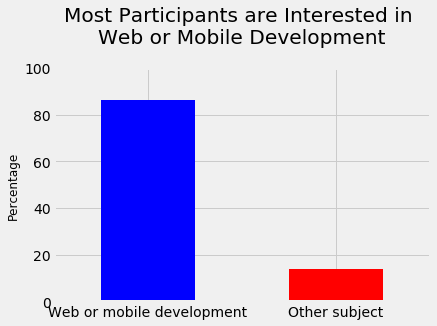

In [940]:
web_or_mobile = interests_no_null.astype(str).str.contains('Web Developer|Mobile Developer')
len(web_or_mobile)

# Frequency table
freq_table = web_or_mobile.value_counts(normalize=True) * 100
print(freq_table)

# Graph to show the frequency table
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar(color=('blue', 'red'))
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
         y=1.08)
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0,1],['Web or mobile development', 'Other subject'], rotation=0)
plt.ylim([0,100])

plt.show()

With 86% of the market interested in Web or Mobile Development, this sample data will be a good representation for our population of interest.

We now want to figure out the best markets to invest in for advertising our courses.

## Analyzing the Best Markets to Advertise In

For my analysis, I'll be working with the CountryLive variable instead of the CountryCitizen variable of the dataset. This is because I'm interested where people live at the moment when we run the ads, not where they are from.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

To make sure I'm working with a representative sample, I'm going to drop all the rows where participants didn't answer what role they are interested in.

In [941]:
df_answered = df[df['JobRoleInterest'].notnull()].copy()

In [942]:
# Generate a frequency table for the CountryLive variable
absolute_freq = df_answered['CountryLive'].value_counts()
relative_freq = df_answered['CountryLive'].value_counts(normalize=True) * 100

# I'll make a new dataframe to better show the data above
freq_df = pd.DataFrame(data = {'Absolute Frequency': absolute_freq, 'Percentage': relative_freq}
                      )

freq_df

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Gibraltar,1,0.014624
Liberia,1,0.014624
Somalia,1,0.014624
Channel Islands,1,0.014624


Based on these results we should be most interested in the US and India. The United Kingdom and Canada are also good choices that should be considered.

I will continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. My company sells subscriptions at a price of $59 per month, and for this reason I'm interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down my analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.


In [943]:
# Creating a column that shows the amount of money a student spent per month.
# I will replace 0 with 1 so as to not divide by zero.
df_answered['MonthsProgramming'].replace(0,1, inplace=True)

df_answered['amount_spent'] = round(df_answered['MoneyForLearning'] / df_answered['MonthsProgramming'], 2)
df_answered['amount_spent'].head(10)

1      13.33
2     200.00
3       0.00
4       0.00
6       0.00
9       5.56
11      0.00
13       NaN
14       NaN
15      0.00
Name: amount_spent, dtype: float64

In [944]:
# Find out how many null values are in this new column and remove them
df_answered['amount_spent'].isnull().sum()

675

In [945]:
df_answered = df_answered[df_answered['amount_spent'].notnull()]
df_answered['amount_spent'].isnull().sum()

0

In [946]:
# Removing all the null values in the CountryLive column as well
df_answered['CountryLive'].isnull().sum()

105

In [947]:
df_answered = df_answered[df_answered['CountryLive'].notnull()]
df_answered['CountryLive'].isnull().sum()

0

In [948]:
# I'll group the remaining data by the CountryLive column to find out how much money a student spends on average each month
student_spending = df_answered.groupby('CountryLive').mean()
student_spending['amount_spent'][['United States of America',
                                 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.998023
India                       135.101102
United Kingdom               45.534337
Canada                      113.510958
Name: amount_spent, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies) )), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct. I'll dig into this a bit more now.

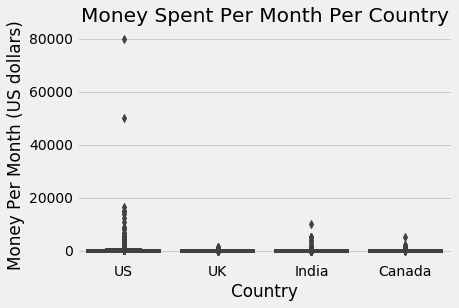

In [949]:
# I'll generate a box plot showing each country's spending per student
import seaborn as sns

top_four = df_answered[df_answered['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(x='CountryLive', y='amount_spent', data=top_four)
plt.title('Money Spent Per Month Per Country')
plt.ylabel('Money Per Month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \\$5000 or more for learning. This is not impossible, but it seems extremely unlikely, so I'll remove every value that goes over \\$20,000 per month.

In [950]:
df_answered = df_answered[df_answered['amount_spent'] < 20000]

I'll now recompute the mean values and plot the box plots again.

In [951]:
student_spending = df_answered.groupby('CountryLive').mean()
student_spending['amount_spent'][['United States of America',
                                 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800136
India                       135.101102
United Kingdom               45.534337
Canada                      113.510958
Name: amount_spent, dtype: float64

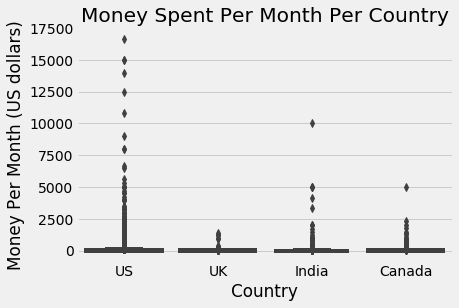

In [952]:
top_four = df_answered[df_answered['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(x='CountryLive', y='amount_spent', data=top_four)
plt.title('Money Spent Per Month Per Country')
plt.ylabel('Money Per Month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Removing the US outliers helps, but we can still see a few extreme outliers in India. It's unclear whether this is good data or not. These people could have attended several bootcamps, which tend to be very expensive. I'll examine this more closely to see if that is the case.

In [953]:
india_outliers = top_four[(top_four['CountryLive'] == 'India') &
                         (top_four['amount_spent'] > 2500)]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,amount_spent
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.00
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.33
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.00
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.00
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.00
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.67


We can see right away that none of the outliers in India attended a bootcamp. With this data it's impossible to know for sure if each of these people really spent that much money learning. However, with the question from the survey being "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?" it seems like a very real possibilty that they missunderstood the question. I will remove these rows to be safe.

In [954]:
top_four = top_four.drop(india_outliers.index)

Looking back at the boxplot above, we can also see quite a few outliers with the United States. I will investigate further on this as well.

In [955]:
us_outliers = top_four[(top_four['CountryLive'] == 'United States of America')
                      & (top_four['amount_spent'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,amount_spent
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.00
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.00
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.00
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.33
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.00
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.00
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.67
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.00
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.67
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.00


Out of the 11 extreme outliers we can see that six people attended bootcamps. This would justify the large amount spent per month on learning. For the other five people it's impossible to tell if their spending amount is accurate. To be safe I will drop these five people like I did the India outliers.

In [956]:
top_four = top_four.drop(us_outliers[us_outliers['AttendedBootcamp'] == 0].index)

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In [957]:
less_than_3_months = top_four[(top_four['CountryLive'] == 'United States of America')
                   & (top_four['amount_spent'] >= 6000)
                   & (top_four['MonthsProgramming'] <= 3)]

top_four = top_four.drop(less_than_3_months.index)

Lastly, we can see one extreme outlier in Canada. I'll examine this one more closely. 

In [958]:
canada_outliers = top_four[(top_four['CountryLive'] == 'Canada')
                           & (top_four['amount_spent'] > 4000)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,amount_spent
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Canada has just one outlier. The person did attend a bootcamp, however they had been programming no more than two months when they completed the survey. It looks like he paid a large amount of money upfront which would skew the per month spending number we are looking for. Due to this reason we will remove them from the dataset.

In [959]:
top_four = top_four.drop(canada_outliers.index)

Now I'll recompute the mean values with this newly cleaned dataset.

In [960]:
top_four.groupby('CountryLive').mean()['amount_spent']

CountryLive
Canada                       93.065397
India                        65.758884
United Kingdom               45.534337
United States of America    142.654634
Name: amount_spent, dtype: float64

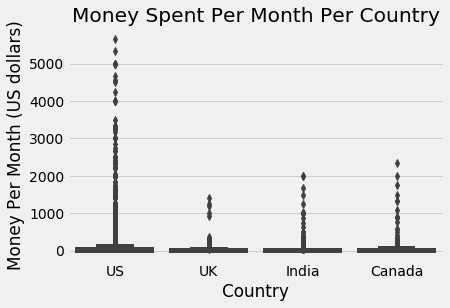

In [961]:
# Visualize the distribution with a boxplot again
sns.boxplot(x='CountryLive', y='amount_spent', data=top_four)
plt.title('Money Spent Per Month Per Country')
plt.ylabel('Money Per Month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choosing the Markets to Advertise In

Based on the data one of the markets we should most definitely advertise in is the United States. They have a lot of new coders who are willing to spend money on learning.

I'm now looking for the second market to advertise in. Canada spends the second most per person by an average of around $30 per person. However, I want to make sure to take into account the amount of potential customers.

In [962]:
n_canada_customers = len(top_four[top_four['CountryLive'] == 'Canada'])
n_india_customers = len(top_four[top_four['CountryLive'] == 'India'])

print('Canada has {} potential customers.'.format(n_canada_customers))
print('India has {} potential customers.'.format(n_india_customers))

Canada has 239 potential customers.
India has 457 potential customers.


In our sample data, India has just under double the amount of potential customers. Even though Canada spends more per person, there are many more potential customers in India. With this information I would make the case to choose India as the second market to advertise in.